[View in Colaboratory](https://colab.research.google.com/github/heumchri/ESPNet/blob/master/testPretrainedESPNet.ipynb)

In [1]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /content/.cache/pip/wheels/17/0f/04/b79c006972335e35472c0b835ed52bfc0815258d409f560108
Successfully built gputil
  Running setup.py bdist_wheel for humanize ... - done
  Stored in directory: /content/.cache/pip/wheels/69/86/6c/f8b8593bc273ec4b0c653d3827f7482bb2001a2781a73b7f44
Successfully built humanize
Gen RAM Free: 12.7 GB  I Proc size: 147.0 MB
GPU RAM Free: 11438MB | Used: 1MB | Util   0% | Total 11439MB


In [2]:
ls

datalab/


# install requirements

In [3]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 

    100% |████████████████████████████████| 592.3MB 51.4MB/s 


In [4]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

# clone repo

In [5]:
!git clone https://github.com/heumchri/ESPNet.git

Cloning into 'ESPNet'...
remote: Counting objects: 296, done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 296 (delta 6), reused 0 (delta 0), pack-reused 277
Receiving objects: 100% (296/296), 13.37 MiB | 14.58 MiB/s, done.
Resolving deltas: 100% (138/138), done.


# download cityscapes dataset

In [6]:
cd /content/

/content


In [7]:
!mkdir datasets

In [8]:
cd datasets/

/content/datasets


In [9]:
!mkdir cityscapes

In [10]:
cd cityscapes/

/content/datasets/cityscapes


In [11]:
!wget --keep-session-cookies --save-cookies=cookies.txt --post-data 'username=heumann.christopher&password=xx&submit=Login' https://www.cityscapes-dataset.com/login/

--2018-06-14 12:34:28--  https://www.cityscapes-dataset.com/login/
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.cityscapes-dataset.com/downloads/ [following]
--2018-06-14 12:34:28--  https://www.cityscapes-dataset.com/downloads/
Reusing existing connection to www.cityscapes-dataset.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html’

index.html              [ <=>                ]  38.79K  --.-KB/s    in 0.1s    

2018-06-14 12:34:29 (382 KB/s) - ‘index.html’ saved [39720]



In [12]:
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=1
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=3

--2018-06-14 12:34:33--  https://www.cityscapes-dataset.com/file-handling/?packageID=1
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252567705 (241M) [application/octet-stream]
Saving to: ‘gtFine_trainvaltest.zip’

gtFine_trainvaltest 100%[===================>] 240.87M   104MB/s    in 2.3s    

2018-06-14 12:34:36 (104 MB/s) - ‘gtFine_trainvaltest.zip’ saved [252567705/252567705]

--2018-06-14 12:34:37--  https://www.cityscapes-dataset.com/file-handling/?packageID=3
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11592327197 (11G) [application/octet-stream]
Saving to: ‘leftImg8bit_trainvaltest.zip’

p        

leftImg8bit_trainva 100%[===================>]  10.80G   104MB/s    in 1m 47s  

2018-06-14 12:36:24 (103 MB/s) - ‘leftImg8bit_trainvaltest.zip’ saved [11592327197/11592327197]



In [13]:
!unzip gtFine_trainvaltest.zip

Archive:  gtFine_trainvaltest.zip
  inflating: README                  
  inflating: license.txt             
   creating: gtFine/train/
   creating: gtFine/train/jena/
  inflating: gtFine/train/jena/jena_000020_000019_gtFine_labelIds.png  
  inflating: gtFine/train/jena/jena_000092_000019_gtFine_polygons.json  
  inflating: gtFine/train/jena/jena_000061_000019_gtFine_polygons.json  
  inflating: gtFine/train/jena/jena_000104_000019_gtFine_polygons.json  
  inflating: gtFine/train/jena/jena_000064_000019_gtFine_labelIds.png  
  inflating: gtFine/train/jena/jena_000015_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/jena/jena_000041_000019_gtFine_labelIds.png  
  inflating: gtFine/train/jena/jena_000097_000019_gtFine_labelIds.png  
  inflating: gtFine/train/jena/jena_000071_000019_gtFine_labelIds.png  
  inflating: gtFine/train/jena/jena_000099_000019_gtFine_color.png  
  inflating: gtFine/train/jena/jena_000004_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/jena/je


  inflating: gtFine/train/stuttgart/stuttgart_000121_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/stuttgart/stuttgart_000186_000019_gtFine_labelIds.png  
  inflating: gtFine/train/stuttgart/stuttgart_000007_000019_gtFine_labelIds.png  
  inflating: gtFine/train/stuttgart/stuttgart_000010_000019_gtFine_labelIds.png  
  inflating: gtFine/train/stuttgart/stuttgart_000155_000019_gtFine_labelIds.png  
  inflating: gtFine/train/stuttgart/stuttgart_000047_000019_gtFine_polygons.json  
  inflating: gtFine/train/stuttgart/stuttgart_000023_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/stuttgart/stuttgart_000008_000019_gtFine_polygons.json  
  inflating: gtFine/train/stuttgart/stuttgart_000072_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/stuttgart/stuttgart_000172_000019_gtFine_color.png  
  inflating: gtFine/train/stuttgart/stuttgart_000113_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/stuttgart/stuttgart_000000_000019_gtFine_instanceIds.png  
 

  inflating: gtFine/train/stuttgart/stuttgart_000034_000019_gtFine_polygons.json  
  inflating: gtFine/train/stuttgart/stuttgart_000168_000019_gtFine_color.png  
  inflating: gtFine/train/stuttgart/stuttgart_000155_000019_gtFine_polygons.json  
  inflating: gtFine/train/stuttgart/stuttgart_000191_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/stuttgart/stuttgart_000156_000019_gtFine_polygons.json  
  inflating: gtFine/train/stuttgart/stuttgart_000194_000019_gtFine_labelIds.png  
  inflating: gtFine/train/stuttgart/stuttgart_000139_000019_gtFine_polygons.json  
  inflating: gtFine/train/stuttgart/stuttgart_000043_000019_gtFine_polygons.json  
  inflating: gtFine/train/stuttgart/stuttgart_000036_000019_gtFine_labelIds.png  
  inflating: gtFine/train/stuttgart/stuttgart_000170_000019_gtFine_color.png  
  inflating: gtFine/train/stuttgart/stuttgart_000122_000019_gtFine_color.png  
  inflating: gtFine/train/stuttgart/stuttgart_000092_000019_gtFine_color.png  
  inflating: gtFine/


  inflating: gtFine/train/ulm/ulm_000082_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/ulm/ulm_000081_000019_gtFine_color.png  
  inflating: gtFine/train/ulm/ulm_000077_000019_gtFine_polygons.json  
  inflating: gtFine/train/ulm/ulm_000051_000019_gtFine_polygons.json  
  inflating: gtFine/train/ulm/ulm_000080_000019_gtFine_color.png  
  inflating: gtFine/train/ulm/ulm_000084_000019_gtFine_labelIds.png  
  inflating: gtFine/train/ulm/ulm_000018_000019_gtFine_color.png  
  inflating: gtFine/train/ulm/ulm_000039_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/ulm/ulm_000092_000019_gtFine_color.png  
  inflating: gtFine/train/ulm/ulm_000000_000019_gtFine_polygons.json  
  inflating: gtFine/train/ulm/ulm_000050_000019_gtFine_labelIds.png  
  inflating: gtFine/train/ulm/ulm_000088_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/ulm/ulm_000047_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/ulm/ulm_000016_000019_gtFine_instanceIds.png  
  inflating: 


  inflating: gtFine/train/dusseldorf/dusseldorf_000124_000019_gtFine_polygons.json  
  inflating: gtFine/train/dusseldorf/dusseldorf_000038_000019_gtFine_polygons.json  
  inflating: gtFine/train/dusseldorf/dusseldorf_000169_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/dusseldorf/dusseldorf_000039_000019_gtFine_polygons.json  
  inflating: gtFine/train/dusseldorf/dusseldorf_000054_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/dusseldorf/dusseldorf_000199_000019_gtFine_labelIds.png  
  inflating: gtFine/train/dusseldorf/dusseldorf_000188_000019_gtFine_polygons.json  
  inflating: gtFine/train/dusseldorf/dusseldorf_000213_000019_gtFine_color.png  
  inflating: gtFine/train/dusseldorf/dusseldorf_000019_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/dusseldorf/dusseldorf_000184_000019_gtFine_color.png  
  inflating: gtFine/train/dusseldorf/dusseldorf_000109_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/dusseldorf/dusseldorf_000079_000019_gtF

  inflating: gtFine/train/dusseldorf/dusseldorf_000160_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/dusseldorf/dusseldorf_000090_000019_gtFine_color.png  
  inflating: gtFine/train/dusseldorf/dusseldorf_000084_000019_gtFine_polygons.json  
  inflating: gtFine/train/dusseldorf/dusseldorf_000064_000019_gtFine_polygons.json  
  inflating: gtFine/train/dusseldorf/dusseldorf_000084_000019_gtFine_labelIds.png  
  inflating: gtFine/train/dusseldorf/dusseldorf_000163_000019_gtFine_polygons.json  
  inflating: gtFine/train/dusseldorf/dusseldorf_000196_000019_gtFine_color.png  
  inflating: gtFine/train/dusseldorf/dusseldorf_000036_000019_gtFine_polygons.json  
  inflating: gtFine/train/dusseldorf/dusseldorf_000213_000019_gtFine_labelIds.png  
  inflating: gtFine/train/dusseldorf/dusseldorf_000048_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/dusseldorf/dusseldorf_000026_000019_gtFine_polygons.json  
  inflating: gtFine/train/dusseldorf/dusseldorf_000002_000019_gtFine_co


  inflating: gtFine/train/dusseldorf/dusseldorf_000116_000019_gtFine_polygons.json  
  inflating: gtFine/train/dusseldorf/dusseldorf_000209_000019_gtFine_color.png  
  inflating: gtFine/train/dusseldorf/dusseldorf_000012_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/dusseldorf/dusseldorf_000138_000019_gtFine_labelIds.png  
  inflating: gtFine/train/dusseldorf/dusseldorf_000147_000019_gtFine_polygons.json  
  inflating: gtFine/train/dusseldorf/dusseldorf_000139_000019_gtFine_polygons.json  
  inflating: gtFine/train/dusseldorf/dusseldorf_000206_000019_gtFine_polygons.json  
  inflating: gtFine/train/dusseldorf/dusseldorf_000016_000019_gtFine_polygons.json  
  inflating: gtFine/train/dusseldorf/dusseldorf_000043_000019_gtFine_polygons.json  
  inflating: gtFine/train/dusseldorf/dusseldorf_000128_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/dusseldorf/dusseldorf_000089_000019_gtFine_polygons.json  
  inflating: gtFine/train/dusseldorf/dusseldorf_000094_000019_gtF

  inflating: gtFine/train/darmstadt/darmstadt_000017_000019_gtFine_labelIds.png  
  inflating: gtFine/train/darmstadt/darmstadt_000035_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/darmstadt/darmstadt_000065_000019_gtFine_color.png  
  inflating: gtFine/train/darmstadt/darmstadt_000041_000019_gtFine_labelIds.png  
  inflating: gtFine/train/darmstadt/darmstadt_000059_000019_gtFine_labelIds.png  
  inflating: gtFine/train/darmstadt/darmstadt_000004_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/darmstadt/darmstadt_000017_000019_gtFine_color.png  
  inflating: gtFine/train/darmstadt/darmstadt_000040_000019_gtFine_color.png  
  inflating: gtFine/train/darmstadt/darmstadt_000043_000019_gtFine_color.png  
  inflating: gtFine/train/darmstadt/darmstadt_000001_000019_gtFine_polygons.json  
  inflating: gtFine/train/darmstadt/darmstadt_000024_000019_gtFine_color.png  
  inflating: gtFine/train/darmstadt/darmstadt_000082_000019_gtFine_instanceIds.png  
  inflating: gtFine/t


  inflating: gtFine/train/zurich/zurich_000119_000019_gtFine_color.png  
  inflating: gtFine/train/zurich/zurich_000099_000019_gtFine_polygons.json  
  inflating: gtFine/train/zurich/zurich_000025_000019_gtFine_color.png  
  inflating: gtFine/train/zurich/zurich_000018_000019_gtFine_polygons.json  
  inflating: gtFine/train/zurich/zurich_000117_000019_gtFine_color.png  
  inflating: gtFine/train/zurich/zurich_000032_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/zurich/zurich_000111_000019_gtFine_color.png  
  inflating: gtFine/train/zurich/zurich_000105_000019_gtFine_labelIds.png  
  inflating: gtFine/train/zurich/zurich_000089_000019_gtFine_labelIds.png  
  inflating: gtFine/train/zurich/zurich_000071_000019_gtFine_color.png  
  inflating: gtFine/train/zurich/zurich_000105_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/zurich/zurich_000024_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/zurich/zurich_000057_000019_gtFine_labelIds.png  
  inflating: gt

  inflating: gtFine/train/bremen/bremen_000150_000019_gtFine_labelIds.png  
  inflating: gtFine/train/bremen/bremen_000282_000019_gtFine_polygons.json  
  inflating: gtFine/train/bremen/bremen_000278_000019_gtFine_polygons.json  
  inflating: gtFine/train/bremen/bremen_000000_000019_gtFine_labelIds.png  
  inflating: gtFine/train/bremen/bremen_000143_000019_gtFine_color.png  
  inflating: gtFine/train/bremen/bremen_000268_000019_gtFine_polygons.json  
  inflating: gtFine/train/bremen/bremen_000248_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/bremen/bremen_000298_000019_gtFine_labelIds.png  
  inflating: gtFine/train/bremen/bremen_000199_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/bremen/bremen_000067_000019_gtFine_labelIds.png  
  inflating: gtFine/train/bremen/bremen_000004_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/bremen/bremen_000158_000019_gtFine_labelIds.png  
  inflating: gtFine/train/bremen/bremen_000110_000019_gtFine_labelIds.png  
  i


  inflating: gtFine/train/bremen/bremen_000286_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/bremen/bremen_000097_000019_gtFine_color.png  
  inflating: gtFine/train/bremen/bremen_000102_000019_gtFine_polygons.json  
  inflating: gtFine/train/bremen/bremen_000091_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/bremen/bremen_000170_000019_gtFine_color.png  
  inflating: gtFine/train/bremen/bremen_000139_000019_gtFine_polygons.json  
  inflating: gtFine/train/bremen/bremen_000060_000019_gtFine_color.png  
  inflating: gtFine/train/bremen/bremen_000048_000019_gtFine_color.png  
  inflating: gtFine/train/bremen/bremen_000255_000019_gtFine_color.png  
  inflating: gtFine/train/bremen/bremen_000244_000019_gtFine_color.png  
  inflating: gtFine/train/bremen/bremen_000225_000019_gtFine_labelIds.png  
  inflating: gtFine/train/bremen/bremen_000250_000019_gtFine_color.png  
  inflating: gtFine/train/bremen/bremen_000032_000019_gtFine_instanceIds.png  
  inflating: gtFine/t

  inflating: gtFine/train/bremen/bremen_000060_000019_gtFine_polygons.json  
  inflating: gtFine/train/bremen/bremen_000182_000019_gtFine_color.png  
  inflating: gtFine/train/bremen/bremen_000153_000019_gtFine_color.png  
  inflating: gtFine/train/bremen/bremen_000273_000019_gtFine_color.png  
  inflating: gtFine/train/bremen/bremen_000069_000019_gtFine_color.png  
  inflating: gtFine/train/bremen/bremen_000271_000019_gtFine_polygons.json  
  inflating: gtFine/train/bremen/bremen_000099_000019_gtFine_color.png  
  inflating: gtFine/train/bremen/bremen_000195_000019_gtFine_color.png  
  inflating: gtFine/train/bremen/bremen_000137_000019_gtFine_color.png  
  inflating: gtFine/train/bremen/bremen_000058_000019_gtFine_labelIds.png  
  inflating: gtFine/train/bremen/bremen_000134_000019_gtFine_polygons.json  
  inflating: gtFine/train/bremen/bremen_000258_000019_gtFine_polygons.json  
  inflating: gtFine/train/bremen/bremen_000217_000019_gtFine_polygons.json  
  inflating: gtFine/train/br


  inflating: gtFine/train/bochum/bochum_000000_008804_gtFine_color.png  
  inflating: gtFine/train/bochum/bochum_000000_023174_gtFine_labelIds.png  
  inflating: gtFine/train/bochum/bochum_000000_037223_gtFine_polygons.json  
  inflating: gtFine/train/bochum/bochum_000000_015645_gtFine_labelIds.png  
  inflating: gtFine/train/bochum/bochum_000000_007150_gtFine_polygons.json  
  inflating: gtFine/train/bochum/bochum_000000_004229_gtFine_color.png  
  inflating: gtFine/train/bochum/bochum_000000_013705_gtFine_polygons.json  
  inflating: gtFine/train/bochum/bochum_000000_026056_gtFine_polygons.json  
  inflating: gtFine/train/bochum/bochum_000000_038150_gtFine_polygons.json  
  inflating: gtFine/train/bochum/bochum_000000_011255_gtFine_color.png  
  inflating: gtFine/train/bochum/bochum_000000_013705_gtFine_color.png  
  inflating: gtFine/train/bochum/bochum_000000_021325_gtFine_polygons.json  
  inflating: gtFine/train/bochum/bochum_000000_004748_gtFine_instanceIds.png  
  inflating: g


  inflating: gtFine/train/hamburg/hamburg_000000_038511_gtFine_polygons.json  
  inflating: gtFine/train/hamburg/hamburg_000000_078579_gtFine_polygons.json  
  inflating: gtFine/train/hamburg/hamburg_000000_077756_gtFine_labelIds.png  
  inflating: gtFine/train/hamburg/hamburg_000000_004985_gtFine_polygons.json  
  inflating: gtFine/train/hamburg/hamburg_000000_018878_gtFine_polygons.json  
  inflating: gtFine/train/hamburg/hamburg_000000_029676_gtFine_labelIds.png  
  inflating: gtFine/train/hamburg/hamburg_000000_062710_gtFine_color.png  
  inflating: gtFine/train/hamburg/hamburg_000000_094717_gtFine_labelIds.png  
  inflating: gtFine/train/hamburg/hamburg_000000_068916_gtFine_instanceIds.png  
  inflating: gtFine/train/hamburg/hamburg_000000_054850_gtFine_polygons.json  
  inflating: gtFine/train/hamburg/hamburg_000000_069096_gtFine_color.png  
  inflating: gtFine/train/hamburg/hamburg_000000_073999_gtFine_instanceIds.png  
  inflating: gtFine/train/hamburg/hamburg_000000_031971_gt


  inflating: gtFine/train/hamburg/hamburg_000000_055894_gtFine_color.png  
  inflating: gtFine/train/hamburg/hamburg_000000_085321_gtFine_instanceIds.png  
  inflating: gtFine/train/hamburg/hamburg_000000_067799_gtFine_color.png  
  inflating: gtFine/train/hamburg/hamburg_000000_077642_gtFine_polygons.json  
  inflating: gtFine/train/hamburg/hamburg_000000_085645_gtFine_instanceIds.png  
  inflating: gtFine/train/hamburg/hamburg_000000_085073_gtFine_color.png  
  inflating: gtFine/train/hamburg/hamburg_000000_102574_gtFine_color.png  
  inflating: gtFine/train/hamburg/hamburg_000000_067223_gtFine_instanceIds.png  
  inflating: gtFine/train/hamburg/hamburg_000000_062039_gtFine_polygons.json  
  inflating: gtFine/train/hamburg/hamburg_000000_063698_gtFine_instanceIds.png  
  inflating: gtFine/train/hamburg/hamburg_000000_046510_gtFine_labelIds.png  
  inflating: gtFine/train/hamburg/hamburg_000000_028439_gtFine_color.png  
  inflating: gtFine/train/hamburg/hamburg_000000_045437_gtFine_c

  inflating: gtFine/train/hamburg/hamburg_000000_065983_gtFine_instanceIds.png  
  inflating: gtFine/train/hamburg/hamburg_000000_071150_gtFine_color.png  
  inflating: gtFine/train/hamburg/hamburg_000000_033506_gtFine_color.png  
  inflating: gtFine/train/hamburg/hamburg_000000_082301_gtFine_instanceIds.png  
  inflating: gtFine/train/hamburg/hamburg_000000_032460_gtFine_labelIds.png  
  inflating: gtFine/train/hamburg/hamburg_000000_019760_gtFine_color.png  
  inflating: gtFine/train/hamburg/hamburg_000000_028608_gtFine_labelIds.png  
  inflating: gtFine/train/hamburg/hamburg_000000_074694_gtFine_instanceIds.png  
  inflating: gtFine/train/hamburg/hamburg_000000_068693_gtFine_color.png  
  inflating: gtFine/train/hamburg/hamburg_000000_022524_gtFine_instanceIds.png  
  inflating: gtFine/train/hamburg/hamburg_000000_094185_gtFine_instanceIds.png  
  inflating: gtFine/train/hamburg/hamburg_000000_057678_gtFine_polygons.json  
  inflating: gtFine/train/hamburg/hamburg_000000_051855_gtFi


  inflating: gtFine/train/tubingen/tubingen_000073_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/tubingen/tubingen_000042_000019_gtFine_color.png  
  inflating: gtFine/train/tubingen/tubingen_000039_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/tubingen/tubingen_000073_000019_gtFine_color.png  
  inflating: gtFine/train/tubingen/tubingen_000043_000019_gtFine_polygons.json  
  inflating: gtFine/train/tubingen/tubingen_000017_000019_gtFine_polygons.json  
  inflating: gtFine/train/tubingen/tubingen_000012_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/tubingen/tubingen_000126_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/tubingen/tubingen_000072_000019_gtFine_color.png  
  inflating: gtFine/train/tubingen/tubingen_000062_000019_gtFine_color.png  
  inflating: gtFine/train/tubingen/tubingen_000093_000019_gtFine_polygons.json  
  inflating: gtFine/train/tubingen/tubingen_000129_000019_gtFine_color.png  
  inflating: gtFine/train/tubingen/tubi

  inflating: gtFine/train/aachen/aachen_000133_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/aachen/aachen_000153_000019_gtFine_labelIds.png  
  inflating: gtFine/train/aachen/aachen_000145_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/aachen/aachen_000110_000019_gtFine_color.png  
  inflating: gtFine/train/aachen/aachen_000163_000019_gtFine_polygons.json  
  inflating: gtFine/train/aachen/aachen_000006_000019_gtFine_color.png  
  inflating: gtFine/train/aachen/aachen_000035_000019_gtFine_labelIds.png  
  inflating: gtFine/train/aachen/aachen_000060_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/aachen/aachen_000124_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/aachen/aachen_000024_000019_gtFine_polygons.json  
  inflating: gtFine/train/aachen/aachen_000100_000019_gtFine_color.png  
  inflating: gtFine/train/aachen/aachen_000035_000019_gtFine_color.png  
  inflating: gtFine/train/aachen/aachen_000113_000019_gtFine_color.png  
  inflating: 


  inflating: gtFine/train/aachen/aachen_000085_000019_gtFine_color.png  
  inflating: gtFine/train/aachen/aachen_000153_000019_gtFine_polygons.json  
  inflating: gtFine/train/aachen/aachen_000094_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/aachen/aachen_000113_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/aachen/aachen_000045_000019_gtFine_color.png  
  inflating: gtFine/train/aachen/aachen_000124_000019_gtFine_color.png  
  inflating: gtFine/train/aachen/aachen_000008_000019_gtFine_labelIds.png  
  inflating: gtFine/train/aachen/aachen_000124_000019_gtFine_polygons.json  
  inflating: gtFine/train/aachen/aachen_000027_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/aachen/aachen_000018_000019_gtFine_labelIds.png  
  inflating: gtFine/train/aachen/aachen_000034_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/aachen/aachen_000034_000019_gtFine_labelIds.png  
  inflating: gtFine/train/aachen/aachen_000107_000019_gtFine_labelIds.png  
  infl


  inflating: gtFine/train/krefeld/krefeld_000000_035124_gtFine_color.png  
  inflating: gtFine/train/krefeld/krefeld_000000_019791_gtFine_polygons.json  
  inflating: gtFine/train/krefeld/krefeld_000000_002083_gtFine_polygons.json  
  inflating: gtFine/train/krefeld/krefeld_000000_023698_gtFine_labelIds.png  
  inflating: gtFine/train/krefeld/krefeld_000000_002083_gtFine_color.png  
  inflating: gtFine/train/krefeld/krefeld_000000_024276_gtFine_labelIds.png  
  inflating: gtFine/train/krefeld/krefeld_000000_030701_gtFine_instanceIds.png  
  inflating: gtFine/train/krefeld/krefeld_000000_014886_gtFine_instanceIds.png  
  inflating: gtFine/train/krefeld/krefeld_000000_017042_gtFine_color.png  
  inflating: gtFine/train/krefeld/krefeld_000000_019125_gtFine_color.png  
  inflating: gtFine/train/krefeld/krefeld_000000_034686_gtFine_color.png  
  inflating: gtFine/train/krefeld/krefeld_000000_025434_gtFine_instanceIds.png  
  inflating: gtFine/train/krefeld/krefeld_000000_005252_gtFine_colo


  inflating: gtFine/train/hanover/hanover_000000_053604_gtFine_labelIds.png  
  inflating: gtFine/train/hanover/hanover_000000_053027_gtFine_color.png  
  inflating: gtFine/train/hanover/hanover_000000_006355_gtFine_labelIds.png  
  inflating: gtFine/train/hanover/hanover_000000_029404_gtFine_instanceIds.png  
  inflating: gtFine/train/hanover/hanover_000000_035491_gtFine_instanceIds.png  
  inflating: gtFine/train/hanover/hanover_000000_009004_gtFine_labelIds.png  
  inflating: gtFine/train/hanover/hanover_000000_019116_gtFine_color.png  
  inflating: gtFine/train/hanover/hanover_000000_025335_gtFine_labelIds.png  
  inflating: gtFine/train/hanover/hanover_000000_011971_gtFine_instanceIds.png  
  inflating: gtFine/train/hanover/hanover_000000_029769_gtFine_color.png  
  inflating: gtFine/train/hanover/hanover_000000_055124_gtFine_polygons.json  
  inflating: gtFine/train/hanover/hanover_000000_038927_gtFine_color.png  
  inflating: gtFine/train/hanover/hanover_000000_005288_gtFine_la


  inflating: gtFine/train/hanover/hanover_000000_014537_gtFine_polygons.json  
  inflating: gtFine/train/hanover/hanover_000000_030346_gtFine_instanceIds.png  
  inflating: gtFine/train/hanover/hanover_000000_044195_gtFine_polygons.json  
  inflating: gtFine/train/hanover/hanover_000000_007342_gtFine_labelIds.png  
  inflating: gtFine/train/hanover/hanover_000000_027766_gtFine_labelIds.png  
  inflating: gtFine/train/hanover/hanover_000000_005970_gtFine_polygons.json  
  inflating: gtFine/train/hanover/hanover_000000_042382_gtFine_color.png  
  inflating: gtFine/train/hanover/hanover_000000_055592_gtFine_polygons.json  
  inflating: gtFine/train/hanover/hanover_000000_015849_gtFine_labelIds.png  
  inflating: gtFine/train/hanover/hanover_000000_012347_gtFine_labelIds.png  
  inflating: gtFine/train/hanover/hanover_000000_045841_gtFine_color.png  
  inflating: gtFine/train/hanover/hanover_000000_053437_gtFine_color.png  
  inflating: gtFine/train/hanover/hanover_000000_024136_gtFine_po


  inflating: gtFine/train/hanover/hanover_000000_040133_gtFine_polygons.json  
  inflating: gtFine/train/hanover/hanover_000000_054276_gtFine_polygons.json  
  inflating: gtFine/train/hanover/hanover_000000_024276_gtFine_polygons.json  
  inflating: gtFine/train/hanover/hanover_000000_052729_gtFine_instanceIds.png  
  inflating: gtFine/train/hanover/hanover_000000_000164_gtFine_color.png  
  inflating: gtFine/train/hanover/hanover_000000_002357_gtFine_color.png  
  inflating: gtFine/train/hanover/hanover_000000_025335_gtFine_color.png  
  inflating: gtFine/train/hanover/hanover_000000_004230_gtFine_labelIds.png  
  inflating: gtFine/train/hanover/hanover_000000_050228_gtFine_color.png  
  inflating: gtFine/train/hanover/hanover_000000_025437_gtFine_labelIds.png  
  inflating: gtFine/train/hanover/hanover_000000_047629_gtFine_polygons.json  
  inflating: gtFine/train/hanover/hanover_000000_027282_gtFine_color.png  
  inflating: gtFine/train/hanover/hanover_000000_003224_gtFine_labelIds


  inflating: gtFine/train/weimar/weimar_000007_000019_gtFine_color.png  
  inflating: gtFine/train/weimar/weimar_000098_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/weimar/weimar_000011_000019_gtFine_labelIds.png  
  inflating: gtFine/train/weimar/weimar_000047_000019_gtFine_color.png  
  inflating: gtFine/train/weimar/weimar_000011_000019_gtFine_polygons.json  
  inflating: gtFine/train/weimar/weimar_000032_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/weimar/weimar_000012_000019_gtFine_labelIds.png  
  inflating: gtFine/train/weimar/weimar_000097_000019_gtFine_color.png  
  inflating: gtFine/train/weimar/weimar_000049_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/weimar/weimar_000023_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/weimar/weimar_000006_000019_gtFine_labelIds.png  
  inflating: gtFine/train/weimar/weimar_000020_000019_gtFine_polygons.json  
  inflating: gtFine/train/weimar/weimar_000115_000019_gtFine_instanceIds.png  
  i


  inflating: gtFine/train/strasbourg/strasbourg_000001_003676_gtFine_color.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_057811_gtFine_labelIds.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_043886_gtFine_polygons.json  
  inflating: gtFine/train/strasbourg/strasbourg_000000_014503_gtFine_color.png  
  inflating: gtFine/train/strasbourg/strasbourg_000000_031223_gtFine_color.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_047336_gtFine_labelIds.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_001449_gtFine_polygons.json  
  inflating: gtFine/train/strasbourg/strasbourg_000001_006916_gtFine_polygons.json  
  inflating: gtFine/train/strasbourg/strasbourg_000001_034923_gtFine_color.png  
  inflating: gtFine/train/strasbourg/strasbourg_000000_016024_gtFine_color.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_009618_gtFine_instanceIds.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_016376_gtFine_color.png  
  i


  inflating: gtFine/train/strasbourg/strasbourg_000000_008677_gtFine_color.png  
  inflating: gtFine/train/strasbourg/strasbourg_000000_030324_gtFine_labelIds.png  
  inflating: gtFine/train/strasbourg/strasbourg_000000_006264_gtFine_color.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_005876_gtFine_color.png  
  inflating: gtFine/train/strasbourg/strasbourg_000000_004660_gtFine_polygons.json  
  inflating: gtFine/train/strasbourg/strasbourg_000001_024379_gtFine_labelIds.png  
  inflating: gtFine/train/strasbourg/strasbourg_000000_033129_gtFine_polygons.json  
  inflating: gtFine/train/strasbourg/strasbourg_000001_062362_gtFine_color.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_035276_gtFine_color.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_052198_gtFine_instanceIds.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_007864_gtFine_color.png  
  inflating: gtFine/train/strasbourg/strasbourg_000000_032346_gtFine_labelIds.png  
  in


  inflating: gtFine/train/strasbourg/strasbourg_000001_057930_gtFine_color.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_039231_gtFine_polygons.json  
  inflating: gtFine/train/strasbourg/strasbourg_000000_017081_gtFine_labelIds.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_022836_gtFine_polygons.json  
  inflating: gtFine/train/strasbourg/strasbourg_000000_025772_gtFine_labelIds.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_006562_gtFine_labelIds.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_050098_gtFine_color.png  
  inflating: gtFine/train/strasbourg/strasbourg_000000_000065_gtFine_color.png  
  inflating: gtFine/train/strasbourg/strasbourg_000000_007441_gtFine_instanceIds.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_031116_gtFine_labelIds.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_029980_gtFine_instanceIds.png  
  inflating: gtFine/train/strasbourg/strasbourg_000000_029020_gtFine_color.p

  inflating: gtFine/train/strasbourg/strasbourg_000001_001722_gtFine_color.png  
  inflating: gtFine/train/strasbourg/strasbourg_000000_013322_gtFine_labelIds.png  
  inflating: gtFine/train/strasbourg/strasbourg_000000_029400_gtFine_color.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_047336_gtFine_polygons.json  
  inflating: gtFine/train/strasbourg/strasbourg_000001_037776_gtFine_instanceIds.png  
  inflating: gtFine/train/strasbourg/strasbourg_000000_018153_gtFine_labelIds.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_060173_gtFine_polygons.json  
  inflating: gtFine/train/strasbourg/strasbourg_000000_017761_gtFine_instanceIds.png  
  inflating: gtFine/train/strasbourg/strasbourg_000000_013944_gtFine_polygons.json  
  inflating: gtFine/train/strasbourg/strasbourg_000000_029729_gtFine_polygons.json  
  inflating: gtFine/train/strasbourg/strasbourg_000001_022363_gtFine_instanceIds.png  
  inflating: gtFine/train/strasbourg/strasbourg_000001_057129_gtFine_


  inflating: gtFine/train/cologne/cologne_000093_000019_gtFine_color.png  
  inflating: gtFine/train/cologne/cologne_000133_000019_gtFine_labelIds.png  
  inflating: gtFine/train/cologne/cologne_000016_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/cologne/cologne_000026_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/cologne/cologne_000137_000019_gtFine_polygons.json  
  inflating: gtFine/train/cologne/cologne_000107_000019_gtFine_polygons.json  
  inflating: gtFine/train/cologne/cologne_000033_000019_gtFine_polygons.json  
  inflating: gtFine/train/cologne/cologne_000019_000019_gtFine_polygons.json  
  inflating: gtFine/train/cologne/cologne_000152_000019_gtFine_labelIds.png  
  inflating: gtFine/train/cologne/cologne_000017_000019_gtFine_labelIds.png  
  inflating: gtFine/train/cologne/cologne_000052_000019_gtFine_polygons.json  
  inflating: gtFine/train/cologne/cologne_000069_000019_gtFine_polygons.json  
  inflating: gtFine/train/cologne/cologne_000101_00001


  inflating: gtFine/train/cologne/cologne_000126_000019_gtFine_color.png  
  inflating: gtFine/train/cologne/cologne_000102_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/cologne/cologne_000131_000019_gtFine_labelIds.png  
  inflating: gtFine/train/cologne/cologne_000116_000019_gtFine_polygons.json  
  inflating: gtFine/train/cologne/cologne_000029_000019_gtFine_color.png  
  inflating: gtFine/train/cologne/cologne_000145_000019_gtFine_labelIds.png  
  inflating: gtFine/train/cologne/cologne_000131_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/cologne/cologne_000152_000019_gtFine_polygons.json  
  inflating: gtFine/train/cologne/cologne_000093_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/cologne/cologne_000001_000019_gtFine_color.png  
  inflating: gtFine/train/cologne/cologne_000091_000019_gtFine_instanceIds.png  
  inflating: gtFine/train/cologne/cologne_000109_000019_gtFine_color.png  
  inflating: gtFine/train/cologne/cologne_000112_000019_gtFin


  inflating: gtFine/train/erfurt/erfurt_000047_000019_gtFine_labelIds.png  
  inflating: gtFine/train/erfurt/erfurt_000086_000019_gtFine_color.png  
  inflating: gtFine/train/erfurt/erfurt_000100_000019_gtFine_labelIds.png  
  inflating: gtFine/train/erfurt/erfurt_000086_000019_gtFine_polygons.json  
  inflating: gtFine/train/erfurt/erfurt_000096_000019_gtFine_polygons.json  
  inflating: gtFine/train/erfurt/erfurt_000036_000019_gtFine_polygons.json  
  inflating: gtFine/train/erfurt/erfurt_000028_000019_gtFine_polygons.json  
  inflating: gtFine/train/erfurt/erfurt_000062_000019_gtFine_labelIds.png  
  inflating: gtFine/train/erfurt/erfurt_000036_000019_gtFine_labelIds.png  
  inflating: gtFine/train/erfurt/erfurt_000050_000019_gtFine_color.png  
  inflating: gtFine/train/erfurt/erfurt_000073_000019_gtFine_labelIds.png  
  inflating: gtFine/train/erfurt/erfurt_000095_000019_gtFine_color.png  
  inflating: gtFine/train/erfurt/erfurt_000078_000019_gtFine_polygons.json  
  inflating: gt

  inflating: gtFine/train/monchengladbach/monchengladbach_000000_017950_gtFine_labelIds.png  
  inflating: gtFine/train/monchengladbach/monchengladbach_000000_023052_gtFine_labelIds.png  
  inflating: gtFine/train/monchengladbach/monchengladbach_000000_033454_gtFine_labelIds.png  
  inflating: gtFine/train/monchengladbach/monchengladbach_000000_007851_gtFine_color.png  
  inflating: gtFine/train/monchengladbach/monchengladbach_000001_000876_gtFine_instanceIds.png  
  inflating: gtFine/train/monchengladbach/monchengladbach_000001_001936_gtFine_labelIds.png  
  inflating: gtFine/train/monchengladbach/monchengladbach_000000_009615_gtFine_color.png  
  inflating: gtFine/train/monchengladbach/monchengladbach_000000_028216_gtFine_polygons.json  
  inflating: gtFine/train/monchengladbach/monchengladbach_000000_005686_gtFine_polygons.json  
  inflating: gtFine/train/monchengladbach/monchengladbach_000000_018575_gtFine_instanceIds.png  
  inflating: gtFine/train/monchengladbach/monchengladbach_


  inflating: gtFine/val/frankfurt/frankfurt_000001_010156_gtFine_color.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_014741_gtFine_polygons.json  
  inflating: gtFine/val/frankfurt/frankfurt_000001_044787_gtFine_labelIds.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_032711_gtFine_instanceIds.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_008200_gtFine_labelIds.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_049770_gtFine_color.png  
  inflating: gtFine/val/frankfurt/frankfurt_000000_013067_gtFine_polygons.json  
  inflating: gtFine/val/frankfurt/frankfurt_000001_058914_gtFine_polygons.json  
  inflating: gtFine/val/frankfurt/frankfurt_000000_004617_gtFine_color.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_062653_gtFine_color.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_038645_gtFine_labelIds.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_019698_gtFine_color.png  
  inflating: gtFine/val/frankfurt/frankfurt_0000


  inflating: gtFine/val/frankfurt/frankfurt_000001_073464_gtFine_labelIds.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_047178_gtFine_instanceIds.png  
  inflating: gtFine/val/frankfurt/frankfurt_000000_009688_gtFine_polygons.json  
  inflating: gtFine/val/frankfurt/frankfurt_000001_062509_gtFine_instanceIds.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_015091_gtFine_color.png  
  inflating: gtFine/val/frankfurt/frankfurt_000000_020880_gtFine_instanceIds.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_025512_gtFine_polygons.json  
  inflating: gtFine/val/frankfurt/frankfurt_000000_011810_gtFine_polygons.json  
  inflating: gtFine/val/frankfurt/frankfurt_000000_021667_gtFine_color.png  
  inflating: gtFine/val/frankfurt/frankfurt_000000_022797_gtFine_polygons.json  
  inflating: gtFine/val/frankfurt/frankfurt_000001_069633_gtFine_instanceIds.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_057954_gtFine_polygons.json  
  inflating: gtFine/val/fran

  inflating: gtFine/val/frankfurt/frankfurt_000001_012699_gtFine_labelIds.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_058057_gtFine_instanceIds.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_050149_gtFine_instanceIds.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_030669_gtFine_color.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_057478_gtFine_polygons.json  
  inflating: gtFine/val/frankfurt/frankfurt_000001_078803_gtFine_polygons.json  
  inflating: gtFine/val/frankfurt/frankfurt_000001_005898_gtFine_labelIds.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_008688_gtFine_color.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_067178_gtFine_polygons.json  
  inflating: gtFine/val/frankfurt/frankfurt_000001_060545_gtFine_labelIds.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_054219_gtFine_color.png  
  inflating: gtFine/val/frankfurt/frankfurt_000001_013710_gtFine_color.png  
  inflating: gtFine/val/frankfurt/frankfurt

  inflating: gtFine/val/munster/munster_000112_000019_gtFine_polygons.json  
  inflating: gtFine/val/munster/munster_000148_000019_gtFine_instanceIds.png  
  inflating: gtFine/val/munster/munster_000167_000019_gtFine_color.png  
  inflating: gtFine/val/munster/munster_000129_000019_gtFine_polygons.json  
  inflating: gtFine/val/munster/munster_000018_000019_gtFine_polygons.json  
  inflating: gtFine/val/munster/munster_000160_000019_gtFine_color.png  
  inflating: gtFine/val/munster/munster_000036_000019_gtFine_instanceIds.png  
  inflating: gtFine/val/munster/munster_000137_000019_gtFine_polygons.json  
  inflating: gtFine/val/munster/munster_000164_000019_gtFine_instanceIds.png  
  inflating: gtFine/val/munster/munster_000003_000019_gtFine_labelIds.png  
  inflating: gtFine/val/munster/munster_000136_000019_gtFine_instanceIds.png  
  inflating: gtFine/val/munster/munster_000170_000019_gtFine_color.png  
  inflating: gtFine/val/munster/munster_000095_000019_gtFine_color.png  
  inflat

  inflating: gtFine/val/munster/munster_000007_000019_gtFine_instanceIds.png  
  inflating: gtFine/val/munster/munster_000092_000019_gtFine_color.png  
  inflating: gtFine/val/munster/munster_000019_000019_gtFine_instanceIds.png  
  inflating: gtFine/val/munster/munster_000070_000019_gtFine_polygons.json  
  inflating: gtFine/val/munster/munster_000110_000019_gtFine_instanceIds.png  
  inflating: gtFine/val/munster/munster_000148_000019_gtFine_color.png  
  inflating: gtFine/val/munster/munster_000144_000019_gtFine_polygons.json  
  inflating: gtFine/val/munster/munster_000169_000019_gtFine_color.png  
  inflating: gtFine/val/munster/munster_000055_000019_gtFine_instanceIds.png  
  inflating: gtFine/val/munster/munster_000126_000019_gtFine_labelIds.png  
  inflating: gtFine/val/munster/munster_000097_000019_gtFine_polygons.json  
  inflating: gtFine/val/munster/munster_000139_000019_gtFine_color.png  
  inflating: gtFine/val/munster/munster_000135_000019_gtFine_polygons.json  
  inflat

  inflating: gtFine/test/berlin/berlin_000244_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000389_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000273_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000332_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000075_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000310_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000438_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000147_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000388_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000007_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000421_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000347_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000021_000019_gtFine_color.png  
  inflating: gtFin


  inflating: gtFine/test/berlin/berlin_000102_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000120_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000206_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000540_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000357_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000347_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000221_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000418_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000451_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000406_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000285_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000006_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000348_000019_gtFine_labelIds.png  
  inflati


  inflating: gtFine/test/berlin/berlin_000123_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000048_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000073_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000186_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000182_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000480_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000040_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000493_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000366_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000265_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000209_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000236_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000427_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/ber


  inflating: gtFine/test/berlin/berlin_000134_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000088_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000035_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000084_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000348_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000055_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000079_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000188_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000022_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000392_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000034_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000375_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000484_000019_gtFine_color.png  
  inflating: gtFine/te


  inflating: gtFine/test/mainz/mainz_000001_021042_gtFine_labelIds.png  
  inflating: gtFine/test/mainz/mainz_000001_015508_gtFine_color.png  
  inflating: gtFine/test/mainz/mainz_000001_005815_gtFine_polygons.json  
  inflating: gtFine/test/mainz/mainz_000000_004237_gtFine_labelIds.png  
  inflating: gtFine/test/mainz/mainz_000001_004132_gtFine_polygons.json  
  inflating: gtFine/test/mainz/mainz_000003_004144_gtFine_polygons.json  
  inflating: gtFine/test/mainz/mainz_000001_026837_gtFine_labelIds.png  
  inflating: gtFine/test/mainz/mainz_000001_005163_gtFine_instanceIds.png  
  inflating: gtFine/test/mainz/mainz_000000_013671_gtFine_instanceIds.png  
  inflating: gtFine/test/mainz/mainz_000001_008540_gtFine_instanceIds.png  
  inflating: gtFine/test/mainz/mainz_000000_009985_gtFine_instanceIds.png  
  inflating: gtFine/test/mainz/mainz_000003_016708_gtFine_polygons.json  
  inflating: gtFine/test/mainz/mainz_000000_004000_gtFine_labelIds.png  
  inflating: gtFine/test/mainz/mainz_

  inflating: gtFine/test/mainz/mainz_000001_036115_gtFine_color.png  
  inflating: gtFine/test/mainz/mainz_000001_031350_gtFine_labelIds.png  
  inflating: gtFine/test/mainz/mainz_000001_038347_gtFine_instanceIds.png  
  inflating: gtFine/test/mainz/mainz_000000_005549_gtFine_polygons.json  
  inflating: gtFine/test/mainz/mainz_000001_019286_gtFine_color.png  
  inflating: gtFine/test/mainz/mainz_000003_010880_gtFine_instanceIds.png  
  inflating: gtFine/test/mainz/mainz_000001_019286_gtFine_instanceIds.png  
  inflating: gtFine/test/mainz/mainz_000001_012541_gtFine_labelIds.png  
  inflating: gtFine/test/mainz/mainz_000003_014319_gtFine_labelIds.png  
  inflating: gtFine/test/mainz/mainz_000001_034209_gtFine_labelIds.png  
  inflating: gtFine/test/mainz/mainz_000001_046981_gtFine_labelIds.png  
  inflating: gtFine/test/mainz/mainz_000001_024439_gtFine_color.png  
  inflating: gtFine/test/mainz/mainz_000001_037170_gtFine_polygons.json  
  inflating: gtFine/test/mainz/mainz_000001_00676


  inflating: gtFine/test/bielefeld/bielefeld_000000_016019_gtFine_labelIds.png  
  inflating: gtFine/test/bielefeld/bielefeld_000000_003546_gtFine_color.png  
  inflating: gtFine/test/bielefeld/bielefeld_000000_001187_gtFine_color.png  
  inflating: gtFine/test/bielefeld/bielefeld_000000_053583_gtFine_polygons.json  
  inflating: gtFine/test/bielefeld/bielefeld_000000_056866_gtFine_color.png  
  inflating: gtFine/test/bielefeld/bielefeld_000000_033979_gtFine_labelIds.png  
  inflating: gtFine/test/bielefeld/bielefeld_000000_046495_gtFine_instanceIds.png  
  inflating: gtFine/test/bielefeld/bielefeld_000000_059303_gtFine_instanceIds.png  
  inflating: gtFine/test/bielefeld/bielefeld_000000_027586_gtFine_instanceIds.png  
  inflating: gtFine/test/bielefeld/bielefeld_000000_049446_gtFine_labelIds.png  
  inflating: gtFine/test/bielefeld/bielefeld_000000_009928_gtFine_polygons.json  
  inflating: gtFine/test/bielefeld/bielefeld_000000_046023_gtFine_instanceIds.png  
  inflating: gtFine/te


  inflating: gtFine/test/bonn/bonn_000040_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/bonn/bonn_000008_000019_gtFine_labelIds.png  
  inflating: gtFine/test/bonn/bonn_000034_000019_gtFine_polygons.json  
  inflating: gtFine/test/bonn/bonn_000041_000019_gtFine_labelIds.png  
  inflating: gtFine/test/bonn/bonn_000035_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/bonn/bonn_000032_000019_gtFine_labelIds.png  
  inflating: gtFine/test/bonn/bonn_000015_000019_gtFine_polygons.json  
  inflating: gtFine/test/bonn/bonn_000045_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/bonn/bonn_000016_000019_gtFine_polygons.json  
  inflating: gtFine/test/bonn/bonn_000038_000019_gtFine_polygons.json  
  inflating: gtFine/test/bonn/bonn_000019_000019_gtFine_labelIds.png  
  inflating: gtFine/test/bonn/bonn_000019_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/bonn/bonn_000026_000019_gtFine_polygons.json  
  inflating: gtFine/test/bonn/bonn_000004_000019_gtFine_lab


  inflating: gtFine/test/munich/munich_000091_000019_gtFine_labelIds.png  
  inflating: gtFine/test/munich/munich_000358_000019_gtFine_polygons.json  
  inflating: gtFine/test/munich/munich_000324_000019_gtFine_polygons.json  
  inflating: gtFine/test/munich/munich_000062_000019_gtFine_polygons.json  
  inflating: gtFine/test/munich/munich_000030_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/munich/munich_000250_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/munich/munich_000107_000019_gtFine_polygons.json  
  inflating: gtFine/test/munich/munich_000051_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/munich/munich_000111_000019_gtFine_labelIds.png  
  inflating: gtFine/test/munich/munich_000157_000019_gtFine_polygons.json  
  inflating: gtFine/test/munich/munich_000320_000019_gtFine_labelIds.png  
  inflating: gtFine/test/munich/munich_000225_000019_gtFine_color.png  
  inflating: gtFine/test/munich/munich_000298_000019_gtFine_instanceIds.png  
  inflatin


  inflating: gtFine/test/munich/munich_000099_000019_gtFine_labelIds.png  
  inflating: gtFine/test/munich/munich_000013_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/munich/munich_000171_000019_gtFine_polygons.json  
  inflating: gtFine/test/munich/munich_000170_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/munich/munich_000390_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/munich/munich_000380_000019_gtFine_polygons.json  
  inflating: gtFine/test/munich/munich_000397_000019_gtFine_color.png  
  inflating: gtFine/test/munich/munich_000184_000019_gtFine_color.png  
  inflating: gtFine/test/munich/munich_000333_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/munich/munich_000274_000019_gtFine_labelIds.png  
  inflating: gtFine/test/munich/munich_000198_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/munich/munich_000370_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/munich/munich_000277_000019_gtFine_instanceIds.png  
  infla

In [14]:
!rm README license.txt

In [15]:
!unzip leftImg8bit_trainvaltest.zip

Archive:  leftImg8bit_trainvaltest.zip
 extracting: README                  
 extracting: license.txt             
   creating: leftImg8bit/train/
   creating: leftImg8bit/train/jena/
 extracting: leftImg8bit/train/jena/jena_000078_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000032_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000055_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000067_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000001_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000111_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000114_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000105_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000021_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000045_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000058_000019_leftImg8bit.png  
 extracting: 


 extracting: leftImg8bit/train/jena/jena_000103_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000057_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000003_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000038_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000061_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000048_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000060_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000027_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000031_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000072_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000043_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000054_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000083_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000077_00


 extracting: leftImg8bit/train/stuttgart/stuttgart_000000_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000095_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000002_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000160_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000111_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000039_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000184_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000038_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000165_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000040_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000060_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000046_000019_leftImg8bit.png  
 ex


 extracting: leftImg8bit/train/stuttgart/stuttgart_000163_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000101_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000005_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000114_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000029_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000063_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000139_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000150_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000123_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000064_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000190_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/stuttgart/stuttgart_000092_000019_leftImg8bit.png  
 ex

 extracting: leftImg8bit/train/ulm/ulm_000063_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000066_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000042_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000037_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000001_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000091_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000004_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000050_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000034_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000092_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000090_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000054_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000045_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000079_000019_leftImg8bit.png  
 extra


 extracting: leftImg8bit/train/ulm/ulm_000051_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000014_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000056_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000035_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000083_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000029_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000036_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000015_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000008_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/ulm/ulm_000049_000019_leftImg8bit.png  
   creating: leftImg8bit/train/dusseldorf/
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000087_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000007_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000114_000019_leftImg8b


 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000107_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000124_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000083_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000029_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000009_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000156_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000043_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000000_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000219_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000143_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000066_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000192_0000


 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000147_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000013_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000196_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000165_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000003_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000141_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000129_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000201_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000017_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000206_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000102_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/dusseldorf/dusseldorf_000157_0000


   creating: leftImg8bit/train/darmstadt/
 extracting: leftImg8bit/train/darmstadt/darmstadt_000050_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000071_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000038_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000073_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000019_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000046_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000083_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000036_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000001_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000039_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000062_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/dar


 extracting: leftImg8bit/train/darmstadt/darmstadt_000052_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000032_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000017_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000060_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000069_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000076_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000065_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000063_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000072_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/darmstadt/darmstadt_000079_000019_leftImg8bit.png  
   creating: leftImg8bit/train/zurich/
 extracting: leftImg8bit/train/zurich/zurich_000040_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/zurich/zurich_000074_0


 extracting: leftImg8bit/train/zurich/zurich_000118_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/zurich/zurich_000067_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/zurich/zurich_000033_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/zurich/zurich_000121_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/zurich/zurich_000028_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/zurich/zurich_000094_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/zurich/zurich_000068_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/zurich/zurich_000014_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/zurich/zurich_000080_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/zurich/zurich_000109_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/zurich/zurich_000023_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/zurich/zurich_000105_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/zurich/zurich_000036_000019_leftImg8bit.png 


 extracting: leftImg8bit/train/bremen/bremen_000214_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000265_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000078_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000037_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000016_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000083_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000144_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000158_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000057_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000105_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000097_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000207_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000140_000019_leftImg8bit.png 


 extracting: leftImg8bit/train/bremen/bremen_000059_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000303_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000312_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000043_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000174_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000086_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000238_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000075_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000246_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000134_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000066_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000230_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000284_000019_leftImg8bit.png 


 extracting: leftImg8bit/train/bremen/bremen_000025_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000141_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000291_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000061_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000142_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000073_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000167_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000054_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000042_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000264_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000070_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000006_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000310_000019_leftImg8bit.png 


 extracting: leftImg8bit/train/bremen/bremen_000145_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000052_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000272_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000157_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000118_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000225_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000156_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000031_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000007_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000256_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000102_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000051_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/bremen/bremen_000074_000019_leftImg8bit.png 


 extracting: leftImg8bit/train/bochum/bochum_000000_038022_leftImg8bit.png  
 extracting: leftImg8bit/train/bochum/bochum_000000_024343_leftImg8bit.png  
 extracting: leftImg8bit/train/bochum/bochum_000000_010700_leftImg8bit.png  
 extracting: leftImg8bit/train/bochum/bochum_000000_023040_leftImg8bit.png  
 extracting: leftImg8bit/train/bochum/bochum_000000_000313_leftImg8bit.png  
 extracting: leftImg8bit/train/bochum/bochum_000000_000885_leftImg8bit.png  
 extracting: leftImg8bit/train/bochum/bochum_000000_004229_leftImg8bit.png  
 extracting: leftImg8bit/train/bochum/bochum_000000_031687_leftImg8bit.png  
 extracting: leftImg8bit/train/bochum/bochum_000000_024855_leftImg8bit.png  
 extracting: leftImg8bit/train/bochum/bochum_000000_015321_leftImg8bit.png  
 extracting: leftImg8bit/train/bochum/bochum_000000_013705_leftImg8bit.png  
 extracting: leftImg8bit/train/bochum/bochum_000000_031922_leftImg8bit.png  
 extracting: leftImg8bit/train/bochum/bochum_000000_030913_leftImg8bit.png 


 extracting: leftImg8bit/train/hamburg/hamburg_000000_041667_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_046566_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_038511_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_057678_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_059720_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_007737_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_068693_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_086499_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_093572_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_000042_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_042885_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_025986_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_0000


 extracting: leftImg8bit/train/hamburg/hamburg_000000_026675_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_028439_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_062371_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_020211_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_048138_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_019373_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_032906_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_019760_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_003488_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_059339_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_079657_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_083696_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_0000


 extracting: leftImg8bit/train/hamburg/hamburg_000000_076392_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_058591_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_046078_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_036527_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_099109_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_102379_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_105123_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_029378_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_095561_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_020563_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_069417_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_077642_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_0000


 extracting: leftImg8bit/train/hamburg/hamburg_000000_105724_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_053563_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_028056_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_054220_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_016447_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_082187_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_022524_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_039546_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_030953_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_103186_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_057487_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_000000_013577_leftImg8bit.png  
 extracting: leftImg8bit/train/hamburg/hamburg_0000


 extracting: leftImg8bit/train/tubingen/tubingen_000004_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000126_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000100_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000057_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000113_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000124_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000050_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000032_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000058_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000018_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000092_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000123_000019_leftImg8bit.png  
 extracting: leftImg8bit/tr


 extracting: leftImg8bit/train/tubingen/tubingen_000035_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000069_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000017_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000103_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000070_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000073_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000125_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000014_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000005_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000031_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000053_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/tubingen/tubingen_000134_000019_leftImg8bit.png  
   creating: leftImg8bit/tr


 extracting: leftImg8bit/train/aachen/aachen_000162_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000021_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000148_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000098_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000122_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000075_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000161_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000093_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000152_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000099_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000071_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000087_000019_leftImg8bit.png 


 extracting: leftImg8bit/train/aachen/aachen_000012_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000002_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000146_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000144_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000036_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000108_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000083_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000015_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000004_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000130_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000060_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000107_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/aachen/aachen_000095_000019_leftImg8bit.png 


 extracting: leftImg8bit/train/krefeld/krefeld_000000_020933_leftImg8bit.png  
 extracting: leftImg8bit/train/krefeld/krefeld_000000_024604_leftImg8bit.png  
 extracting: leftImg8bit/train/krefeld/krefeld_000000_018004_leftImg8bit.png  
 extracting: leftImg8bit/train/krefeld/krefeld_000000_021814_leftImg8bit.png  
 extracting: leftImg8bit/train/krefeld/krefeld_000000_000316_leftImg8bit.png  
 extracting: leftImg8bit/train/krefeld/krefeld_000000_009926_leftImg8bit.png  
 extracting: leftImg8bit/train/krefeld/krefeld_000000_027596_leftImg8bit.png  
 extracting: leftImg8bit/train/krefeld/krefeld_000000_003707_leftImg8bit.png  
 extracting: leftImg8bit/train/krefeld/krefeld_000000_020624_leftImg8bit.png  
 extracting: leftImg8bit/train/krefeld/krefeld_000000_013766_leftImg8bit.png  
 extracting: leftImg8bit/train/krefeld/krefeld_000000_025812_leftImg8bit.png  
 extracting: leftImg8bit/train/krefeld/krefeld_000000_031257_leftImg8bit.png  
 extracting: leftImg8bit/train/krefeld/krefeld_0000


 extracting: leftImg8bit/train/hanover/hanover_000000_007897_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_057532_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_051842_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_012675_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_000712_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_019456_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_023881_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_027007_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_023975_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_047629_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_032559_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_019282_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_0000


 extracting: leftImg8bit/train/hanover/hanover_000000_034141_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_037516_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_042992_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_016558_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_005288_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_004752_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_040051_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_014919_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_051536_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_026743_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_034015_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_028460_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_0000


 extracting: leftImg8bit/train/hanover/hanover_000000_048508_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_028202_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_045446_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_048765_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_035606_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_047870_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_049465_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_009004_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_055592_leftImg8bit.png  
 extracting: leftImg8bit/train/hanover/hanover_000000_005732_leftImg8bit.png  
   creating: leftImg8bit/train/weimar/
 extracting: leftImg8bit/train/weimar/weimar_000018_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/weimar/weimar_000077_000019_leftImg8bit.png  
 extracting: lef


 extracting: leftImg8bit/train/weimar/weimar_000035_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/weimar/weimar_000033_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/weimar/weimar_000127_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/weimar/weimar_000006_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/weimar/weimar_000061_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/weimar/weimar_000071_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/weimar/weimar_000123_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/weimar/weimar_000049_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/weimar/weimar_000086_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/weimar/weimar_000023_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/weimar/weimar_000119_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/weimar/weimar_000055_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/weimar/weimar_000134_000019_leftImg8bit.png 


 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_054275_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000000_004660_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_007524_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_045135_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_008771_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000000_002183_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000000_014416_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_023515_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_037090_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_029178_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_019247_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_0437


 extracting: leftImg8bit/train/strasbourg/strasbourg_000000_000295_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_036232_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_030120_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_060173_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000000_013944_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000000_025907_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_003489_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000000_017159_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_018872_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_000113_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_042434_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_0423


 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_061685_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_042558_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_039558_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000000_011880_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000000_014584_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_001449_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_004745_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_022151_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_057811_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_057930_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_039703_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_0258


 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_056142_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_060061_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_031976_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_052840_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000000_029339_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_054639_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_061285_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_026856_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000000_013863_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_051317_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000000_036016_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_0039


 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_034633_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000000_026316_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_000710_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_041215_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000000_035713_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_010445_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_036480_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_048121_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000000_030435_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000000_016436_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_039374_leftImg8bit.png  
 extracting: leftImg8bit/train/strasbourg/strasbourg_000001_0633


 extracting: leftImg8bit/train/cologne/cologne_000078_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000036_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000037_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000045_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000023_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000005_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000087_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000109_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000103_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000069_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000147_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000148_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_0001


 extracting: leftImg8bit/train/cologne/cologne_000000_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000139_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000072_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000041_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000003_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000008_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000063_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000061_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000064_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000117_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000112_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_000020_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/cologne/cologne_0001


 extracting: leftImg8bit/train/erfurt/erfurt_000107_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/erfurt/erfurt_000094_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/erfurt/erfurt_000086_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/erfurt/erfurt_000083_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/erfurt/erfurt_000060_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/erfurt/erfurt_000106_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/erfurt/erfurt_000102_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/erfurt/erfurt_000104_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/erfurt/erfurt_000072_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/erfurt/erfurt_000016_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/erfurt/erfurt_000081_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/erfurt/erfurt_000105_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/erfurt/erfurt_000095_000019_leftImg8bit.png 


 extracting: leftImg8bit/train/erfurt/erfurt_000038_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/erfurt/erfurt_000056_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/erfurt/erfurt_000033_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/erfurt/erfurt_000078_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/erfurt/erfurt_000028_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/erfurt/erfurt_000093_000019_leftImg8bit.png  
   creating: leftImg8bit/train/monchengladbach/
 extracting: leftImg8bit/train/monchengladbach/monchengladbach_000000_011383_leftImg8bit.png  
 extracting: leftImg8bit/train/monchengladbach/monchengladbach_000000_023489_leftImg8bit.png  
 extracting: leftImg8bit/train/monchengladbach/monchengladbach_000000_033683_leftImg8bit.png  
 extracting: leftImg8bit/train/monchengladbach/monchengladbach_000000_001068_leftImg8bit.png  
 extracting: leftImg8bit/train/monchengladbach/monchengladbach_000000_010505_leftImg8bit.png  
 extracting: l


 extracting: leftImg8bit/train/monchengladbach/monchengladbach_000000_018294_leftImg8bit.png  
 extracting: leftImg8bit/train/monchengladbach/monchengladbach_000000_018114_leftImg8bit.png  
 extracting: leftImg8bit/train/monchengladbach/monchengladbach_000000_024243_leftImg8bit.png  
 extracting: leftImg8bit/train/monchengladbach/monchengladbach_000000_017950_leftImg8bit.png  
 extracting: leftImg8bit/train/monchengladbach/monchengladbach_000000_007851_leftImg8bit.png  
 extracting: leftImg8bit/train/monchengladbach/monchengladbach_000000_019901_leftImg8bit.png  
 extracting: leftImg8bit/train/monchengladbach/monchengladbach_000001_000168_leftImg8bit.png  
 extracting: leftImg8bit/train/monchengladbach/monchengladbach_000000_031360_leftImg8bit.png  
 extracting: leftImg8bit/train/monchengladbach/monchengladbach_000000_018575_leftImg8bit.png  
 extracting: leftImg8bit/train/monchengladbach/monchengladbach_000000_007695_leftImg8bit.png  
 extracting: leftImg8bit/train/monchengladbach/mo


 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_064305_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_049698_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_007857_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_012519_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_034816_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_032018_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_060135_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_019969_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_025713_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_065617_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000000_017228_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_062016_leftImg8bit.png  
 extracting: leftImg8bit/va


 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_058176_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000000_015676_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000000_018797_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_012870_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_064925_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_023235_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_010600_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_077233_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_067735_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_014221_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000000_021879_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_041664_leftImg8bit.png  
 extracting: leftImg8bit/va


 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_064651_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_014406_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_048355_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_051516_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_040575_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_017842_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_041074_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_057478_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_041517_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_055306_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_062653_leftImg8bit.png  
 extracting: leftImg8bit/val/frankfurt/frankfurt_000001_007407_leftImg8bit.png  
 extracting: leftImg8bit/va


 extracting: leftImg8bit/val/munster/munster_000067_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000097_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000077_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000138_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000058_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000030_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000083_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000085_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000036_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000026_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000068_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000064_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000024_000019_leftImg8bit.png 


 extracting: leftImg8bit/val/munster/munster_000126_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000099_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000071_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000148_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000128_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000114_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000018_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000130_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000113_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000063_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000157_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000060_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000116_000019_leftImg8bit.png 


 extracting: leftImg8bit/val/munster/munster_000103_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/munster/munster_000027_000019_leftImg8bit.png  
   creating: leftImg8bit/val/lindau/
 extracting: leftImg8bit/val/lindau/lindau_000032_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/lindau/lindau_000036_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/lindau/lindau_000001_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/lindau/lindau_000056_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/lindau/lindau_000034_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/lindau/lindau_000021_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/lindau/lindau_000012_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/lindau/lindau_000028_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/lindau/lindau_000025_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/lindau/lindau_000052_000019_leftImg8bit.png  
 extracting: leftImg8bit/val/lindau/lindau_000031_000019_l


 extracting: leftImg8bit/test/berlin/berlin_000104_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000451_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000513_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000193_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000379_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000137_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000131_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000208_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000153_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000311_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000512_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000335_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000326_000019_leftImg8bit.png  
 extracting


 extracting: leftImg8bit/test/berlin/berlin_000099_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000457_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000543_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000100_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000230_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000088_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000285_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000324_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000399_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000016_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000336_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000028_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000337_000019_leftImg8bit.png  
 extracting


 extracting: leftImg8bit/test/berlin/berlin_000536_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000064_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000292_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000495_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000181_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000036_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000212_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000480_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000378_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000024_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000398_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000532_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000509_000019_leftImg8bit.png  
 extracting


 extracting: leftImg8bit/test/berlin/berlin_000520_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000048_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000109_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000254_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000267_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000243_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000313_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000214_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000384_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000288_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000040_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000066_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000373_000019_leftImg8bit.png  
 extracting


 extracting: leftImg8bit/test/berlin/berlin_000435_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000221_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000169_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000058_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000231_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000234_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000263_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000359_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000149_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000355_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000237_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000323_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000111_000019_leftImg8bit.png  
 extracting


 extracting: leftImg8bit/test/berlin/berlin_000117_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000380_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000329_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000162_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000053_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000392_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000047_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000046_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000156_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000219_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000266_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000455_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000377_000019_leftImg8bit.png  
 extracting


 extracting: leftImg8bit/test/berlin/berlin_000463_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000526_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000130_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000299_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000315_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000492_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000135_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000187_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000083_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000474_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000195_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000178_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/berlin/berlin_000302_000019_leftImg8bit.png  
 extracting


 extracting: leftImg8bit/test/mainz/mainz_000003_010019_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000003_016877_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000000_007415_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_014626_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000003_004144_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_015235_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_025623_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000000_003619_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_046381_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_040367_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000003_003042_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000003_010772_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_005665_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/m


 extracting: leftImg8bit/test/mainz/mainz_000001_015508_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_031697_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_024718_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000000_004000_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000003_012995_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000000_020415_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_015117_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000000_011339_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000002_000061_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000000_008509_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_037532_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000000_019686_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_041172_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/m


 extracting: leftImg8bit/test/mainz/mainz_000001_011333_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000000_021457_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_046981_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000000_003049_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000003_013983_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000000_015052_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000002_000381_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000003_007701_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_034681_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_037905_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000003_006863_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000003_007255_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_003012_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/m


 extracting: leftImg8bit/test/mainz/mainz_000003_012341_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000003_011352_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_019286_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000003_017171_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_045651_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000000_000093_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000000_022417_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000001_005815_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000000_009751_leftImg8bit.png  
 extracting: leftImg8bit/test/mainz/mainz_000003_016360_leftImg8bit.png  
   creating: leftImg8bit/test/bielefeld/
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_038924_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_005741_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_0000


 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_019416_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_037159_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_059729_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_048754_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_021625_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_008581_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_007186_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_039082_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_027928_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_040035_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_017051_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_056226_leftImg8bit.png  
 extracting: le


 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_017279_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_034929_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_022835_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_052155_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_001011_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_026550_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_025426_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_058934_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_055145_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_043100_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_041014_leftImg8bit.png  
 extracting: leftImg8bit/test/bielefeld/bielefeld_000000_043389_leftImg8bit.png  
 extracting: le


 extracting: leftImg8bit/test/leverkusen/leverkusen_000005_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/leverkusen/leverkusen_000012_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/leverkusen/leverkusen_000011_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/leverkusen/leverkusen_000019_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/leverkusen/leverkusen_000016_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/leverkusen/leverkusen_000039_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/leverkusen/leverkusen_000057_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/leverkusen/leverkusen_000056_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/leverkusen/leverkusen_000001_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/leverkusen/leverkusen_000014_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/leverkusen/leverkusen_000045_000019_leftImg8bit.png  
   creating: leftImg8bit/test/bonn/
 extracting: leftImg8bit/test/bonn/bonn


 extracting: leftImg8bit/test/munich/munich_000105_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000380_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000269_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000136_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000037_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000192_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000206_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000023_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000349_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000177_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000266_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000247_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000375_000019_leftImg8bit.png  
 extracting


 extracting: leftImg8bit/test/munich/munich_000124_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000088_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000204_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000154_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000279_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000321_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000096_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000203_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000257_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000179_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000176_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000170_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000251_000019_leftImg8bit.png  
 extracting


 extracting: leftImg8bit/test/munich/munich_000397_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000027_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000029_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000167_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000362_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000225_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000159_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000156_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000182_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000195_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000338_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000393_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000376_000019_leftImg8bit.png  
 extracting


 extracting: leftImg8bit/test/munich/munich_000305_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000199_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000009_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000090_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000150_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000395_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000160_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000178_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000214_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000325_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000373_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000157_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000018_000019_leftImg8bit.png  
 extracting


 extracting: leftImg8bit/test/munich/munich_000390_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000267_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000254_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000222_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000125_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000249_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000180_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000065_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000107_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000108_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000329_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000340_000019_leftImg8bit.png  
 extracting: leftImg8bit/test/munich/munich_000337_000019_leftImg8bit.png  
 extracting

# test pretrained model

In [16]:
cd /content/ESPNet/test

/content/ESPNet/test


In [29]:
!python VisualizeResults.py --modelType 1 --data_dir /content/datasets/cityscapes/leftImg8bit/test/munich/

0
100
200
300


## visualize results

In [26]:
ls results/

c_munich_000000_000019_leftImg8bit.png  munich_000000_000019_leftImg8bit.png
c_munich_000001_000019_leftImg8bit.png  munich_000001_000019_leftImg8bit.png
c_munich_000002_000019_leftImg8bit.png  munich_000002_000019_leftImg8bit.png
c_munich_000003_000019_leftImg8bit.png  munich_000003_000019_leftImg8bit.png
c_munich_000004_000019_leftImg8bit.png  munich_000004_000019_leftImg8bit.png
c_munich_000005_000019_leftImg8bit.png  munich_000005_000019_leftImg8bit.png
c_munich_000006_000019_leftImg8bit.png  munich_000006_000019_leftImg8bit.png
c_munich_000007_000019_leftImg8bit.png  munich_000007_000019_leftImg8bit.png
c_munich_000008_000019_leftImg8bit.png  munich_000008_000019_leftImg8bit.png
c_munich_000009_000019_leftImg8bit.png  munich_000009_000019_leftImg8bit.png
c_munich_000010_000019_leftImg8bit.png  munich_000010_000019_leftImg8bit.png
c_munich_000011_000019_leftImg8bit.png  munich_000011_000019_leftImg8bit.png
c_munich_000012_000019_leftImg8bit.png  munich_000012_000019_leftImg8bit.png

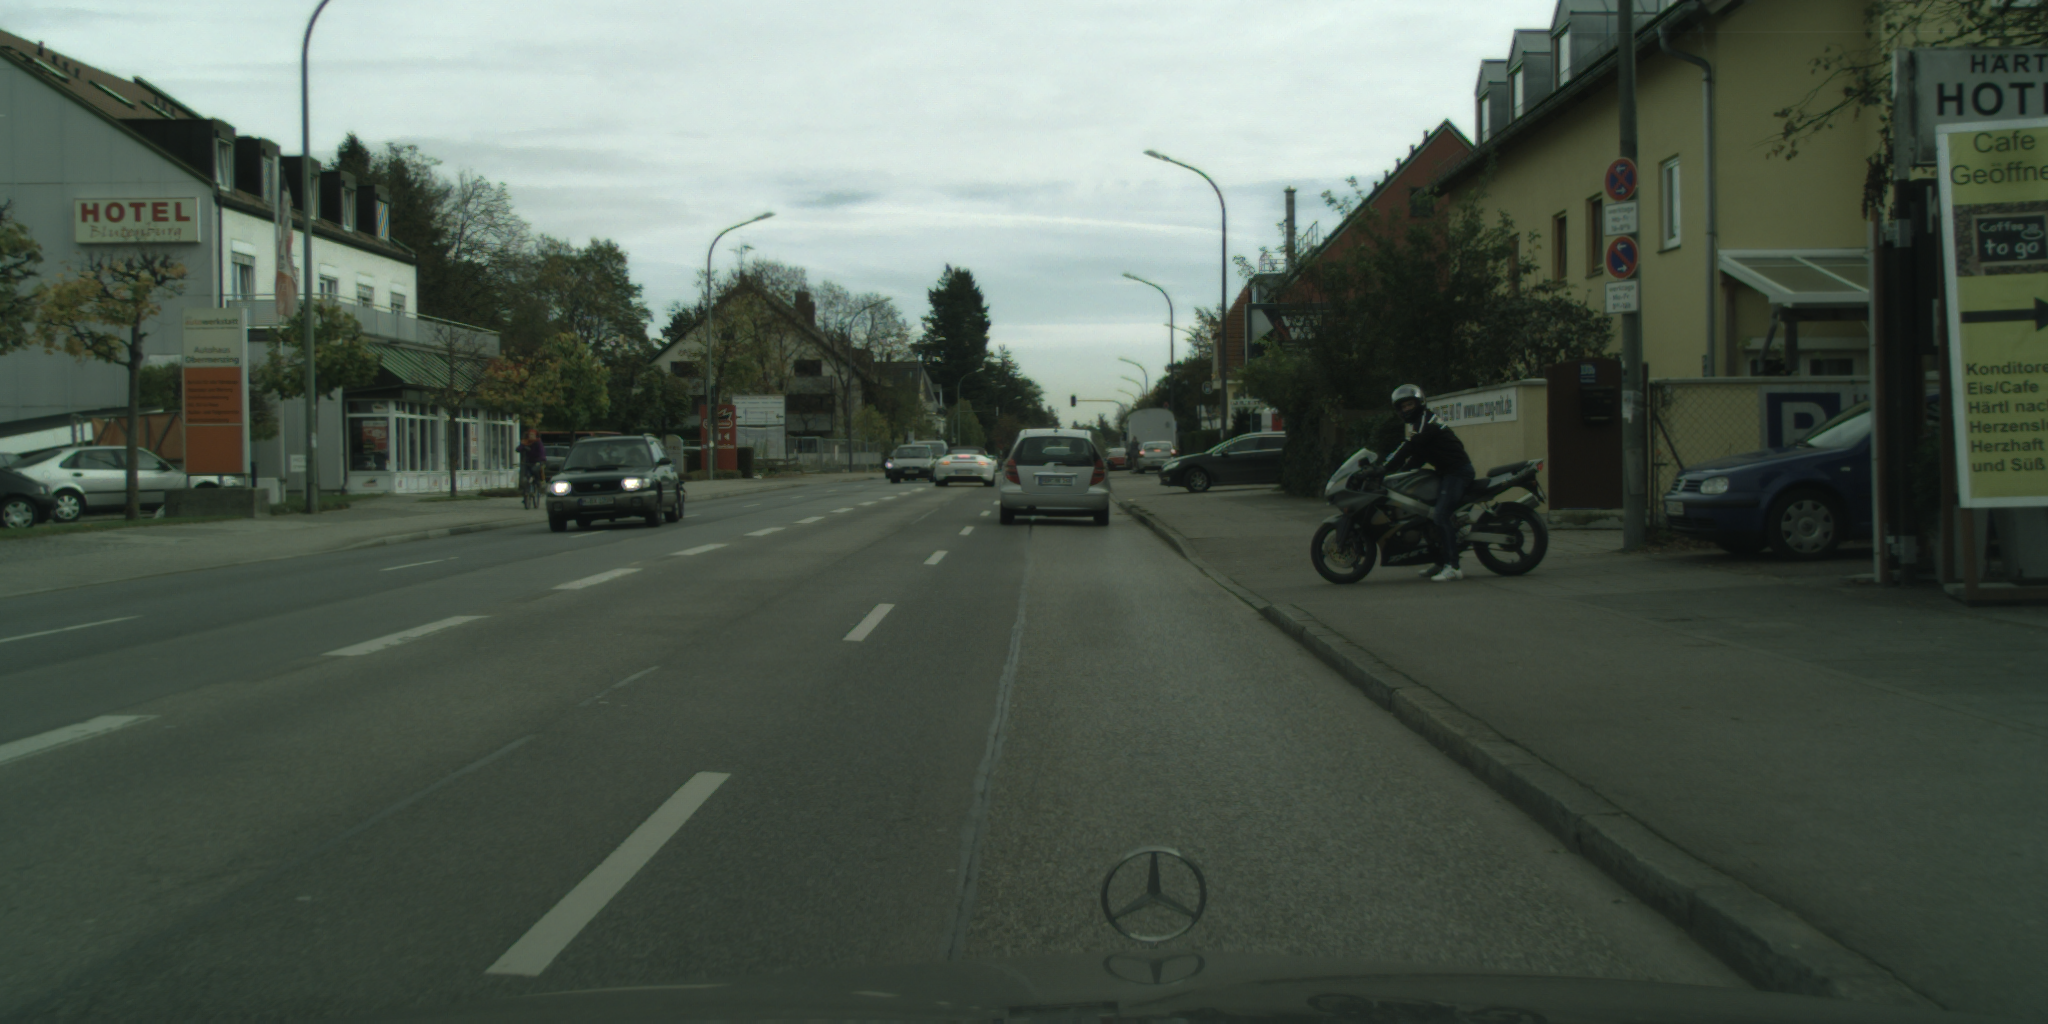

In [27]:
from IPython.display import Image
Image('/content/datasets/cityscapes/leftImg8bit/test/munich/munich_000000_000019_leftImg8bit.png')


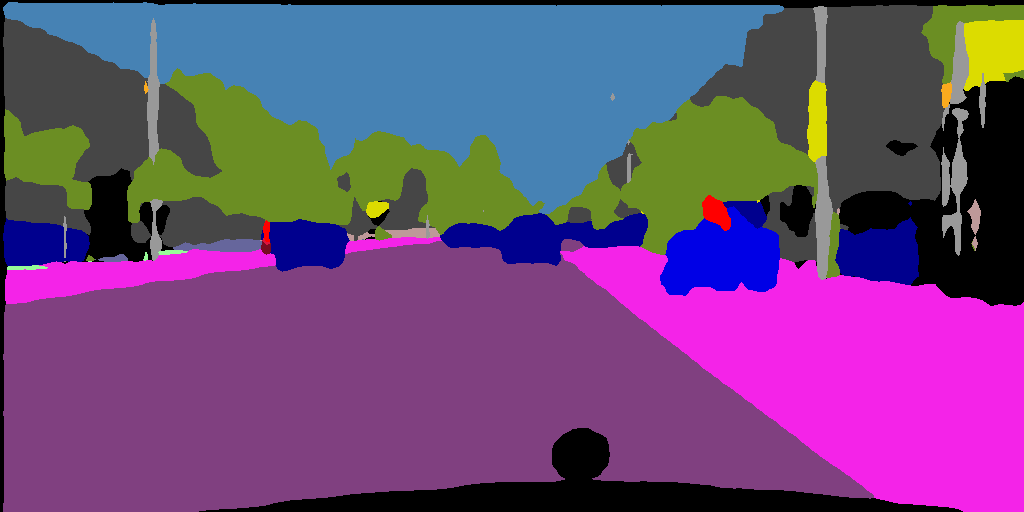

In [28]:
Image('results/c_munich_000000_000019_leftImg8bit.png')

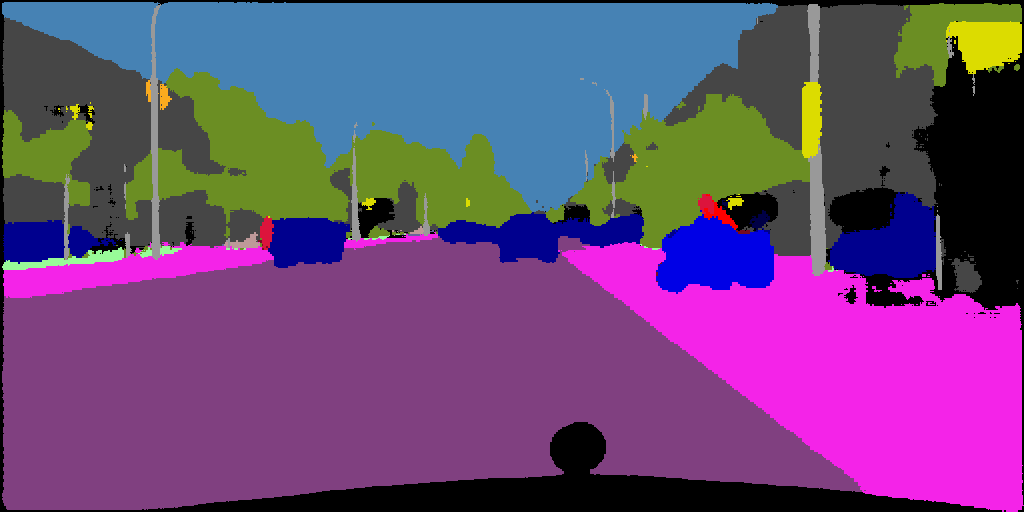

In [30]:
Image('results/c_munich_000000_000019_leftImg8bit.png')

In [23]:
#!rm -r results/

In [0]:
#!kill -9 -1